In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# making a list of missing values
missing_values = [". "]

In [3]:
# import dataset
ZambiaData = pd.read_csv("Zamphia2016adultind.csv",
                         na_values=missing_values)


/Users/zoeyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (592,593,594) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#C:/Users/joshua09/Desktop/SPRING_SEMESTER_2022/CS_519/INCLASS_PROJECT

In [5]:
ZambiaData.head()

,country,householdid,personid,province,district,indstatus,gender,age,relattohh,livehere,...,hivkpswt244,hivkpswt245,hivkpswt246,hivkpswt247,hivkpswt248,hivkpswt249,hivkpswt250,hivkpswt251,hivkpswt252,hivkpswt253
0,Zambia,ZM000000000001,ZM00000000000101,2,204,8,1,62,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zambia,ZM000000000001,ZM00000000000102,2,204,1,1,24,8,1,...,1417.72869,1422.973099,1422.447391,1420.861531,1421.774695,1418.567224,1421.223189,1418.814183,1418.518172,1426.282791
2,Zambia,ZM000000000001,ZM00000000000103,2,204,1,2,30,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Zambia,ZM000000000003,ZM00000000000301,3,303,8,2,68,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zambia,ZM000000000004,ZM00000000000401,5,502,2,1,29,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ZambiaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29884 entries, 0 to 29883
Columns: 1390 entries, country  to hivkpswt253
dtypes: float64(1220), int64(46), object(124)
memory usage: 316.9+ MB


In [7]:
ZambiaData.columns

Index(['country ', 'householdid ', 'personid ', 'province ', 'district ',
       'indstatus ', 'gender ', 'age ', 'relattohh ', 'livehere ',
       ...
       'hivkpswt244 ', 'hivkpswt245 ', 'hivkpswt246 ', 'hivkpswt247 ',
       'hivkpswt248 ', 'hivkpswt249 ', 'hivkpswt250 ', 'hivkpswt251 ',
       'hivkpswt252 ', 'hivkpswt253'],
      dtype='object', length=1390)

In [8]:
ZambiaData.columns = ZambiaData.columns.str.replace(' ','')
#df = ZambiaData.loc[["province","gender","age","schlhlevel","ethgrptr"]]

In [9]:
df = ZambiaData.loc[:,["province","gender","age","schlhlevel","religion","evermar","agemar","curmar",
                       "numwif","hivtestnum","mcage","firstsxage","firstexcndm","partlifetm","partsexway3",
                       "partlastcndm3","partlastetoh3","cd4testever","urban","evertested","wealthscorecont",
                       "education","intwt0","hivstatusfinal"]]

In [10]:
df.columns

Index(['province', 'gender', 'age', 'schlhlevel', 'religion', 'evermar',
       'agemar', 'curmar', 'numwif', 'hivtestnum', 'mcage', 'firstsxage',
       'firstexcndm', 'partlifetm', 'partsexway3', 'partlastcndm3',
       'partlastetoh3', 'cd4testever', 'urban', 'evertested',
       'wealthscorecont', 'education', 'intwt0', 'hivstatusfinal'],
      dtype='object')

In [11]:
df['schlhlevel'].head()

0    3.0
1    3.0
2    3.0
3    NaN
4    2.0
Name: schlhlevel, dtype: float64

In [12]:
df.head()
#df['province']=df['province'].str.replace(r'[^\w\s]+', '')

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,numwif,hivtestnum,...,partsexway3,partlastcndm3,partlastetoh3,cd4testever,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
0,2,1,62,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,99,1.933,99,0.000000,99
1,2,1,24,3.0,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,1.933,4,741.079949,2
2,2,2,30,3.0,2.0,1.0,26.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,1.933,4,463.448787,2
3,3,2,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,99,-0.351,99,0.000000,99
4,5,1,29,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,99,0.201,99,0.000000,99


In [13]:
df.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,numwif,hivtestnum,...,partsexway3,partlastcndm3,partlastetoh3,cd4testever,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,29884.000000,29884.000000,29884.000000,27629.000000,21823.000000,21813.000000,13809.000000,14451.000000,5036.000000,4764.000000,...,480.000000,480.000000,480.000000,1794.000000,29884.000000,29884.000000,29733.000000,29884.000000,29884.000000,29884.000000
mean,5.145831,1.528142,34.166075,1.683630,11.480365,1.276991,20.843146,1.427721,1.037331,1.840050,...,0.985417,1.691667,3.425000,1.029543,1.558593,27.764121,0.127856,28.602764,267.886963,36.872373
std,2.743679,0.499216,15.901894,0.849752,28.591095,0.891830,4.935214,1.177037,1.463694,0.897908,...,0.467967,0.665848,1.579686,1.069643,0.496563,43.458974,1.026824,42.837463,205.761114,46.633686
min,1.000000,1.000000,15.000000,0.000000,-9.000000,-9.000000,5.000000,-9.000000,-7.000000,0.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,1.000000,-1.179000,1.000000,0.000000,1.000000
25%,3.000000,1.000000,21.000000,1.000000,2.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,-0.800000,2.000000,0.000000,2.000000
50%,5.000000,2.000000,30.000000,2.000000,2.000000,1.000000,20.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,4.000000,1.000000,2.000000,1.000000,-0.157000,3.000000,314.389051,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,2.000000,24.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,4.000000,1.000000,2.000000,99.000000,0.987000,99.000000,398.301312,99.000000
max,10.000000,2.000000,80.000000,8.000000,96.000000,2.000000,55.000000,5.000000,38.000000,12.000000,...,3.000000,2.000000,4.000000,2.000000,2.000000,99.000000,3.195000,99.000000,2177.662031,99.000000


In [14]:
# select variable with count of at least 13500

In [15]:
df1 = df.loc[:,["province","gender","age","schlhlevel","religion","evermar","agemar","curmar","firstsxage","firstexcndm","partlifetm",
                       "urban","evertested","wealthscorecont","education","intwt0","hivstatusfinal"]]

In [16]:
df1.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,29884.000000,29884.000000,29884.000000,27629.000000,21823.000000,21813.000000,13809.000000,14451.000000,17837.000000,18317.000000,17962.000000,29884.000000,29884.000000,29733.000000,29884.000000,29884.000000,29884.000000
mean,5.145831,1.528142,34.166075,1.683630,11.480365,1.276991,20.843146,1.427721,17.541963,1.671835,3.357477,1.558593,27.764121,0.127856,28.602764,267.886963,36.872373
std,2.743679,0.499216,15.901894,0.849752,28.591095,0.891830,4.935214,1.177037,3.607633,1.264540,5.945766,0.496563,43.458974,1.026824,42.837463,205.761114,46.633686
min,1.000000,1.000000,15.000000,0.000000,-9.000000,-9.000000,5.000000,-9.000000,5.000000,-9.000000,0.000000,1.000000,1.000000,-1.179000,1.000000,0.000000,1.000000
25%,3.000000,1.000000,21.000000,1.000000,2.000000,1.000000,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.800000,2.000000,0.000000,2.000000
50%,5.000000,2.000000,30.000000,2.000000,2.000000,1.000000,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.157000,3.000000,314.389051,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,2.000000,24.000000,1.000000,19.000000,2.000000,3.000000,2.000000,99.000000,0.987000,99.000000,398.301312,99.000000
max,10.000000,2.000000,80.000000,8.000000,96.000000,2.000000,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,99.000000,3.195000,99.000000,2177.662031,99.000000


In [17]:
# remove na's in all the rows
df1new = df1.dropna(axis=0)

In [18]:
df1new.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.0,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000,12070.000000
mean,5.170091,1.628998,35.485087,1.583181,11.581276,1.0,20.839851,1.436205,17.822949,1.841342,3.532974,1.586910,1.174814,0.039896,2.561640,344.323960,13.109114
std,2.758303,0.483093,10.426297,0.788411,28.711859,0.0,4.859441,1.180053,3.624159,0.511786,6.163691,0.492409,2.206829,0.977427,1.880638,129.320913,31.127927
min,1.000000,1.000000,15.000000,0.000000,-9.000000,1.0,5.000000,-9.000000,5.000000,-9.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.814000,2.000000,284.198028,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.263000,2.000000,341.200471,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.812000,3.000000,401.271066,2.000000
max,10.000000,2.000000,59.000000,8.000000,96.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,99.000000,3.195000,99.000000,1395.169228,99.000000


In [19]:
#df1new1 = df1.dropna(axis=0,how="all")

In [20]:
#df1new1.describe()

In [21]:
df1new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12070 entries, 2 to 29880
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   province         12070 non-null  int64  
 1   gender           12070 non-null  int64  
 2   age              12070 non-null  int64  
 3   schlhlevel       12070 non-null  float64
 4   religion         12070 non-null  float64
 5   evermar          12070 non-null  float64
 6   agemar           12070 non-null  float64
 7   curmar           12070 non-null  float64
 8   firstsxage       12070 non-null  float64
 9   firstexcndm      12070 non-null  float64
 10  partlifetm       12070 non-null  float64
 11  urban            12070 non-null  int64  
 12  evertested       12070 non-null  int64  
 13  wealthscorecont  12070 non-null  float64
 14  education        12070 non-null  int64  
 15  intwt0           12070 non-null  float64
 16  hivstatusfinal   12070 non-null  int64  
dtypes: float64(1

In [22]:
# write to csv 
#df1new.to_csv(path_or_buf="C:/Users/joshua09/Downloads/subsetzambia.csv", index=False)

In [23]:
# to check for missing/na's
df1new.isna().sum()

province           0
gender             0
age                0
schlhlevel         0
religion           0
evermar            0
agemar             0
curmar             0
firstsxage         0
firstexcndm        0
partlifetm         0
urban              0
evertested         0
wealthscorecont    0
education          0
intwt0             0
hivstatusfinal     0
dtype: int64

In [24]:
# subset for only 1 feature using .loc
#new = df1new["schlhlevel"].loc[df1new['schlhlevel'] !=8]

In [25]:
# remove rows with 99 in the hivstatusfinal column of the dataset
df2 = df1new[df1new.hivstatusfinal !=99]

In [26]:
df2.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000,10669.0,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000,10669.000000
mean,5.155310,1.639235,35.473615,1.574093,11.501453,1.0,20.781142,1.439029,17.776924,1.841972,3.542694,1.587965,1.151186,0.033107,2.559096,351.570073,1.830350
std,2.759033,0.480245,10.476024,0.777970,28.611331,0.0,4.842669,1.190734,3.604551,0.519544,5.984151,0.492224,1.673789,0.969170,1.982630,117.068667,0.375343
min,1.000000,1.000000,15.000000,0.000000,-9.000000,1.0,5.000000,-9.000000,5.000000,-9.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.811000,2.000000,288.124027,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.268000,2.000000,343.179264,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.796000,3.000000,402.032540,2.000000
max,10.000000,2.000000,59.000000,8.000000,96.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,99.000000,3.195000,99.000000,1395.169228,2.000000


In [27]:
#df2["hivstatusfinal"].unique()

In [28]:
# remove rows with 99 in the education column of the dataset
df3 = df2[df2.education !=99]

In [29]:
df3.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000,10665.0,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000
mean,5.154618,1.639381,35.471824,1.574215,11.504923,1.0,20.780684,1.439194,17.776371,1.842100,3.542991,1.587811,1.151055,0.033250,2.522925,351.557296,1.830380
std,2.759082,0.480203,10.475043,0.778046,28.616128,0.0,4.842880,1.190927,3.604012,0.519508,5.985185,0.492252,1.674061,0.969302,0.665053,117.064555,0.375316
min,1.000000,1.000000,15.000000,0.000000,-9.000000,1.0,5.000000,-9.000000,5.000000,-9.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.811000,2.000000,288.124027,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.268000,2.000000,343.179264,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.796000,3.000000,402.016952,2.000000
max,10.000000,2.000000,59.000000,8.000000,96.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,99.000000,3.195000,4.000000,1395.169228,2.000000


In [30]:
# remove rows with 99 in the evertested column of the dataset
df4 = df3[df3.evertested !=99]

In [31]:
df4.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.0,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000
mean,5.155037,1.639561,35.472332,1.574001,11.498875,1.0,20.780623,1.439317,17.776308,1.842150,3.543331,1.587788,1.123523,0.033305,2.522885,351.550796,1.830332
std,2.758870,0.480150,10.473927,0.778011,28.608123,0.0,4.842728,1.191071,3.603398,0.519513,5.985956,0.492256,0.329052,0.969239,0.665096,117.058856,0.375358
min,1.000000,1.000000,15.000000,0.000000,-9.000000,1.0,5.000000,-9.000000,5.000000,-9.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.811000,2.000000,288.181248,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.268000,2.000000,343.179264,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.796000,3.000000,402.016952,2.000000
max,10.000000,2.000000,59.000000,8.000000,96.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,2.000000,3.195000,4.000000,1395.169228,2.000000


In [32]:
df5 = df4[df4.intwt0 !=0]

In [33]:
df5.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.0,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000
mean,5.155037,1.639561,35.472332,1.574001,11.498875,1.0,20.780623,1.439317,17.776308,1.842150,3.543331,1.587788,1.123523,0.033305,2.522885,351.550796,1.830332
std,2.758870,0.480150,10.473927,0.778011,28.608123,0.0,4.842728,1.191071,3.603398,0.519513,5.985956,0.492256,0.329052,0.969239,0.665096,117.058856,0.375358
min,1.000000,1.000000,15.000000,0.000000,-9.000000,1.0,5.000000,-9.000000,5.000000,-9.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.811000,2.000000,288.181248,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.268000,2.000000,343.179264,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.796000,3.000000,402.016952,2.000000
max,10.000000,2.000000,59.000000,8.000000,96.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,2.000000,3.195000,4.000000,1395.169228,2.000000


In [34]:
df6 = df5[df5.firstexcndm !=-9]

In [35]:
df7 = df6[df6.firstexcndm !=-8]

In [36]:
df7.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.0,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000,10646.000000
mean,5.154612,1.639395,35.477456,1.573455,11.504603,1.0,20.777381,1.439038,17.776818,1.857036,3.543491,1.588108,1.123708,0.032325,2.522262,351.579060,1.830453
std,2.759220,0.480199,10.477981,0.778170,28.615577,0.0,4.841852,1.190850,3.603554,0.350053,5.989794,0.492199,0.329264,0.969184,0.664770,117.079046,0.375252
min,1.000000,1.000000,15.000000,0.000000,-9.000000,1.0,5.000000,-9.000000,5.000000,1.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.811000,2.000000,288.380139,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.269000,2.000000,343.179264,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.795000,3.000000,402.015122,2.000000
max,10.000000,2.000000,59.000000,8.000000,96.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,2.000000,3.195000,4.000000,1395.169228,2.000000


In [37]:
df8 = df7[df7.curmar !=-8]

In [38]:
df9 = df8[df8.curmar !=-9]

In [39]:
df9.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.0,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000,10622.000000
mean,5.155809,1.639239,35.483995,1.572209,11.500000,1.0,20.770759,1.461589,17.773112,1.857277,3.540859,1.588778,1.123800,0.031206,2.520900,351.507918,1.830540
std,2.759908,0.480244,10.477907,0.777963,28.609385,0.0,4.836064,1.093235,3.598470,0.349806,5.986252,0.492079,0.329368,0.968999,0.664149,117.056602,0.375175
min,1.000000,1.000000,15.000000,0.000000,-9.000000,1.0,5.000000,1.000000,5.000000,1.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.811000,2.000000,288.124027,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.269500,2.000000,343.159472,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.794000,3.000000,401.523619,2.000000
max,10.000000,2.000000,59.000000,8.000000,96.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,2.000000,3.195000,4.000000,1395.169228,2.000000


In [40]:
df10 = df9[df9.religion !=-9]

In [41]:
df11 = df10[df10.religion !=-8]

In [42]:
df12 = df11[df11.religion !=96]

In [43]:
df12.describe()

,province,gender,age,schlhlevel,religion,evermar,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.0,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000
mean,5.211571,1.622113,35.619908,1.569404,1.823919,1.0,20.842293,1.466926,17.753360,1.857833,3.635657,1.598278,1.125052,0.015533,2.522365,352.105061,1.831373
std,2.792459,0.484885,10.496666,0.769109,0.463031,0.0,4.854159,1.098364,3.615362,0.349240,5.927169,0.490272,0.330796,0.964372,0.663334,118.287427,0.374441
min,1.000000,1.000000,15.000000,0.000000,1.000000,1.0,5.000000,1.000000,5.000000,1.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,1.000000,2.000000,1.0,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.817000,2.000000,287.828989,2.000000
50%,5.000000,2.000000,34.000000,1.000000,2.000000,1.0,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.299000,2.000000,344.655059,2.000000
75%,8.000000,2.000000,43.000000,2.000000,2.000000,1.0,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.763000,3.000000,403.081700,2.000000
max,10.000000,2.000000,59.000000,8.000000,4.000000,1.0,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,2.000000,3.195000,4.000000,1395.169228,2.000000


In [44]:
# write to csv
#df12.to_csv(path_or_buf="C:/Users/joshua09/Downloads/subsetzambia1+.csv", index=False)

In [45]:
# final dataset removing "schlhlevel" and "evermar" we will be using the education colummn instead of school level and
# we will exclude the evermar features because it only contains people that are were/was/are married
data = df12.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16]]

In [46]:
data.describe()

,province,gender,age,religion,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
count,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000
mean,5.211571,1.622113,35.619908,1.823919,20.842293,1.466926,17.753360,1.857833,3.635657,1.598278,1.125052,0.015533,2.522365,352.105061,1.831373
std,2.792459,0.484885,10.496666,0.463031,4.854159,1.098364,3.615362,0.349240,5.927169,0.490272,0.330796,0.964372,0.663334,118.287427,0.374441
min,1.000000,1.000000,15.000000,1.000000,5.000000,1.000000,5.000000,1.000000,0.000000,1.000000,1.000000,-1.164000,1.000000,112.141736,1.000000
25%,2.000000,1.000000,27.000000,2.000000,18.000000,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,-0.817000,2.000000,287.828989,2.000000
50%,5.000000,2.000000,34.000000,2.000000,20.000000,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,-0.299000,2.000000,344.655059,2.000000
75%,8.000000,2.000000,43.000000,2.000000,24.000000,1.000000,20.000000,2.000000,4.000000,2.000000,1.000000,0.763000,3.000000,403.081700,2.000000
max,10.000000,2.000000,59.000000,4.000000,55.000000,5.000000,53.000000,2.000000,100.000000,2.000000,2.000000,3.195000,4.000000,1395.169228,2.000000


In [47]:
data.head()

,province,gender,age,religion,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
2,2,2,30,2.0,26.0,1.0,18.0,1.0,2.0,1,1,1.933,4,463.448787,2
5,5,2,24,2.0,18.0,1.0,18.0,2.0,1.0,2,1,0.201,3,424.957343,2
6,4,1,29,1.0,21.0,1.0,16.0,2.0,5.0,2,2,-0.956,2,571.388459,2
9,1,2,40,1.0,15.0,1.0,15.0,1.0,4.0,2,1,0.489,3,334.693400,1
10,1,2,46,2.0,32.0,4.0,15.0,2.0,6.0,2,1,0.489,3,410.417871,2


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 2 to 29880
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   province         9524 non-null   int64  
 1   gender           9524 non-null   int64  
 2   age              9524 non-null   int64  
 3   religion         9524 non-null   float64
 4   agemar           9524 non-null   float64
 5   curmar           9524 non-null   float64
 6   firstsxage       9524 non-null   float64
 7   firstexcndm      9524 non-null   float64
 8   partlifetm       9524 non-null   float64
 9   urban            9524 non-null   int64  
 10  evertested       9524 non-null   int64  
 11  wealthscorecont  9524 non-null   float64
 12  education        9524 non-null   int64  
 13  intwt0           9524 non-null   float64
 14  hivstatusfinal   9524 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 1.2 MB


# BOX PLOT (DESCRIPTIVE)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

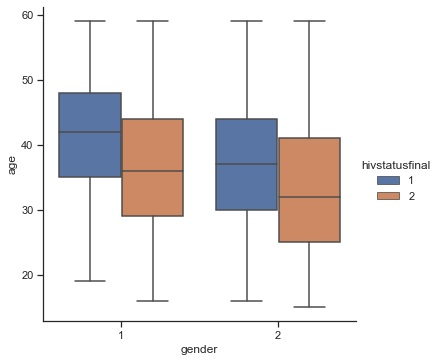

In [50]:
sns.catplot(x="gender", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

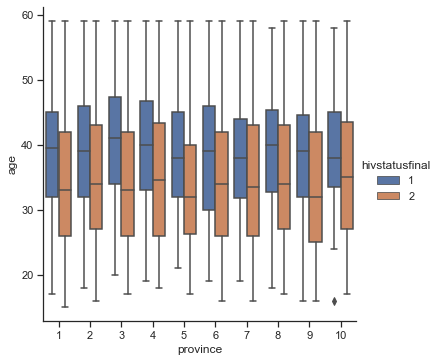

In [51]:
sns.catplot(x="province", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

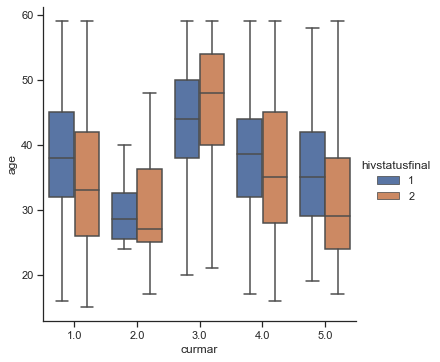

In [52]:
sns.catplot(x="curmar", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

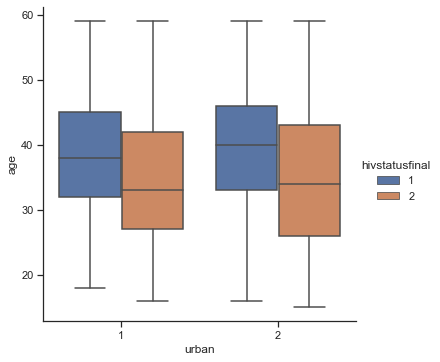

In [53]:
sns.catplot(x="urban", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

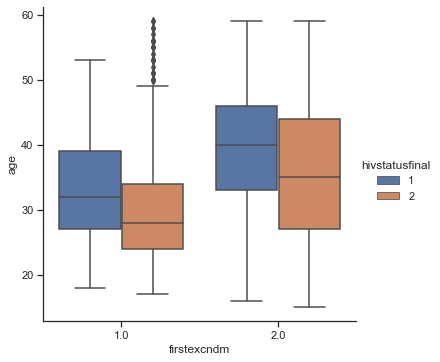

In [54]:
sns.catplot(x="firstexcndm", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

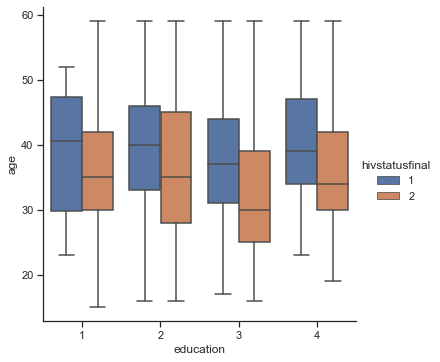

In [55]:
sns.catplot(x="education", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

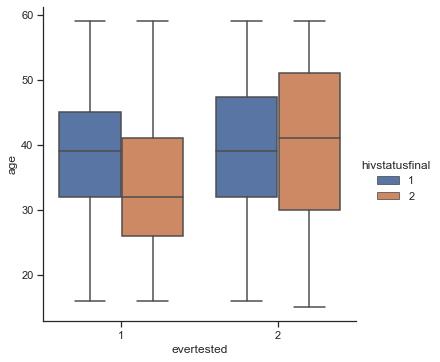

In [56]:
sns.catplot(x="evertested", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

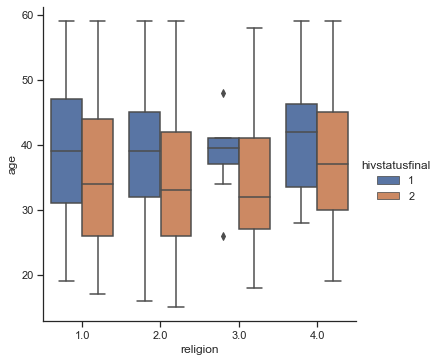

In [57]:
sns.catplot(x="religion", y="age", hue="hivstatusfinal", kind="box", data=data)
plt.show()

In [58]:
# final dataset
#data.to_csv(path_or_buf="C:/Users/joshua09/Downloads/FinalHivData.csv", index=False)

In [59]:
#cols = data.columns.drop("wealthscorecont","intwt0")

In [60]:
#data[cols] = data[cols].astype(int)

In [61]:
# convert from float to integer
data[['religion','agemar','curmar','firstsxage','firstexcndm','partlifetm']] = data[['religion','agemar','curmar','firstsxage','firstexcndm','partlifetm']].astype(int)

/Users/zoeyle/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [62]:
data.dtypes

province             int64
gender               int64
age                  int64
religion             int64
agemar               int64
curmar               int64
firstsxage           int64
firstexcndm          int64
partlifetm           int64
urban                int64
evertested           int64
wealthscorecont    float64
education            int64
intwt0             float64
hivstatusfinal       int64
dtype: object

# Selection based on data types

In [63]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#we did not use standard scaler due to the age feature having negative values after scaling

In [64]:
# will be using the minmax scaler to account for the negatives in some of the columns in the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [65]:
data[['age','agemar','firstsxage','partlifetm','wealthscorecont','intwt0']] = scaler.fit_transform(data.loc[:,['age','agemar','firstsxage','partlifetm','wealthscorecont','intwt0']])

<ipython-input-65-0ea340ac47d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['age','agemar','firstsxage','partlifetm','wealthscorecont','intwt0']] = scaler.fit_transform(data.loc[:,['age','agemar','firstsxage','partlifetm','wealthscorecont','intwt0']])
/Users/zoeyle/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [66]:
data.head()

,province,gender,age,religion,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
2,2,2,0.340909,2,0.42,1,0.270833,1,0.02,1,1,0.710484,4,0.273811,2
5,5,2,0.204545,2,0.26,1,0.270833,2,0.01,2,1,0.313145,3,0.243811,2
6,4,1,0.318182,1,0.32,1,0.229167,2,0.05,2,2,0.047717,2,0.357940,2
9,1,2,0.568182,1,0.20,1,0.208333,1,0.04,2,1,0.379215,3,0.173458,1
10,1,2,0.704545,2,0.54,4,0.208333,2,0.06,2,1,0.379215,3,0.232478,2


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 2 to 29880
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   province         9524 non-null   int64  
 1   gender           9524 non-null   int64  
 2   age              9524 non-null   float64
 3   religion         9524 non-null   int64  
 4   agemar           9524 non-null   float64
 5   curmar           9524 non-null   int64  
 6   firstsxage       9524 non-null   float64
 7   firstexcndm      9524 non-null   int64  
 8   partlifetm       9524 non-null   float64
 9   urban            9524 non-null   int64  
 10  evertested       9524 non-null   int64  
 11  wealthscorecont  9524 non-null   float64
 12  education        9524 non-null   int64  
 13  intwt0           9524 non-null   float64
 14  hivstatusfinal   9524 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 1.4 MB


In [68]:
data.head(5)

,province,gender,age,religion,agemar,curmar,firstsxage,firstexcndm,partlifetm,urban,evertested,wealthscorecont,education,intwt0,hivstatusfinal
2,2,2,0.340909,2,0.42,1,0.270833,1,0.02,1,1,0.710484,4,0.273811,2
5,5,2,0.204545,2,0.26,1,0.270833,2,0.01,2,1,0.313145,3,0.243811,2
6,4,1,0.318182,1,0.32,1,0.229167,2,0.05,2,2,0.047717,2,0.357940,2
9,1,2,0.568182,1,0.20,1,0.208333,1,0.04,2,1,0.379215,3,0.173458,1
10,1,2,0.704545,2,0.54,4,0.208333,2,0.06,2,1,0.379215,3,0.232478,2


In [69]:
# convert the data into a panda datafrmae
data_new = pd.DataFrame(data)

In [70]:
data_new.keys()

Index(['province', 'gender', 'age', 'religion', 'agemar', 'curmar',
       'firstsxage', 'firstexcndm', 'partlifetm', 'urban', 'evertested',
       'wealthscorecont', 'education', 'intwt0', 'hivstatusfinal'],
      dtype='object')

In [71]:
col = data_new.columns

In [72]:
print(col)

Index(['province', 'gender', 'age', 'religion', 'agemar', 'curmar',
       'firstsxage', 'firstexcndm', 'partlifetm', 'urban', 'evertested',
       'wealthscorecont', 'education', 'intwt0', 'hivstatusfinal'],
      dtype='object')


In [73]:
for m in col:
    print(data_new[m].value_counts(),"\n")

2     1569
5     1382
9     1196
6      980
3      903
8      840
1      828
7      814
4      522
10     490
Name: province, dtype: int64 

2    5925
1    3599
Name: gender, dtype: int64 

0.386364    402
0.340909    397
0.227273    364
0.295455    357
0.454545    341
0.431818    326
0.204545    325
0.318182    313
0.250000    306
0.181818    305
0.409091    295
0.613636    294
0.477273    292
0.568182    283
0.522727    277
0.272727    259
0.363636    259
0.159091    252
0.545455    249
0.500000    240
0.659091    227
0.590909    221
0.681818    221
0.636364    210
0.136364    196
0.840909    190
0.704545    189
0.113636    184
0.750000    180
0.795455    161
0.090909    151
0.727273    139
0.818182    134
0.886364    131
1.000000    124
0.863636    115
0.931818    112
0.068182    103
0.909091    102
0.772727     97
0.977273     90
0.954545     88
0.045455     12
0.022727     10
0.000000      1
Name: age, dtype: int64 

2    7472
1    1912
4      95
3      45
Name: religion, dtype: i

# DUMMY CODING

__one-Hot Encoding__

__to preserve the information (and avoid collinearity). That is why the pd.get_dummies function has another Boolean argument,__    __drop_first=True, which drops the first category__        

In [74]:
# to get columns with binary values only
binary_cols = []
for i in col:
    if data_new[i].nunique() == 2:
        binary_cols.append(i)

In [75]:
data_new['province'].nunique()

10

In [76]:
# The total columns in the dataset that are binary
print("The total columns that are binary in the dataset are:", len(binary_cols), "columns")

The total columns that are binary in the dataset are: 5 columns


In [77]:
# The total column in the dataset
print("The total columns in the new dataset are:", len(col), "columns")

The total columns in the new dataset are: 15 columns


In [78]:
# converting the columns with yes/no to values of 0 and 1
# 0=yes and 1 =no
data_new1 = pd.get_dummies(data_new, drop_first=True, columns= binary_cols)   # drop_first helps to remove the repetition first column

 Note that: 
 gender_2:          female ==> "0",           Male ==> "1"        
 firstexcndm_2:     yes  ==> "0",             No ==> "1"     
 Urban_2:           Urban  ==> "0",           rural ==> "2"     
 evertested_2       EverTested(yes) ==> "0",  Nevertested ==> "2"          
 hivstatusfinal:    positive ==> "0",         Negative ==> "1"    

In [79]:
data_new1.head()

,province,age,religion,agemar,curmar,firstsxage,partlifetm,wealthscorecont,education,intwt0,gender_2,firstexcndm_2,urban_2,evertested_2,hivstatusfinal_2
2,2,0.340909,2,0.42,1,0.270833,0.02,0.710484,4,0.273811,1,0,0,0,1
5,5,0.204545,2,0.26,1,0.270833,0.01,0.313145,3,0.243811,1,1,1,0,1
6,4,0.318182,1,0.32,1,0.229167,0.05,0.047717,2,0.357940,0,1,1,1,1
9,1,0.568182,1,0.20,1,0.208333,0.04,0.379215,3,0.173458,1,0,1,0,0
10,1,0.704545,2,0.54,4,0.208333,0.06,0.379215,3,0.232478,1,1,1,0,1


In [80]:
data_new1.dtypes

province              int64
age                 float64
religion              int64
agemar              float64
curmar                int64
firstsxage          float64
partlifetm          float64
wealthscorecont     float64
education             int64
intwt0              float64
gender_2              uint8
firstexcndm_2         uint8
urban_2               uint8
evertested_2          uint8
hivstatusfinal_2      uint8
dtype: object

___ordinal encoding___

In [81]:
# convert the column education from int to category
data_new1['education'] = data_new1['education'].astype("category")

In [82]:
# Assigning numerical values
data_new1['education'] = data_new1['education'].cat.codes

In [83]:
data_new1.head(5)

,province,age,religion,agemar,curmar,firstsxage,partlifetm,wealthscorecont,education,intwt0,gender_2,firstexcndm_2,urban_2,evertested_2,hivstatusfinal_2
2,2,0.340909,2,0.42,1,0.270833,0.02,0.710484,3,0.273811,1,0,0,0,1
5,5,0.204545,2,0.26,1,0.270833,0.01,0.313145,2,0.243811,1,1,1,0,1
6,4,0.318182,1,0.32,1,0.229167,0.05,0.047717,1,0.357940,0,1,1,1,1
9,1,0.568182,1,0.20,1,0.208333,0.04,0.379215,2,0.173458,1,0,1,0,0
10,1,0.704545,2,0.54,4,0.208333,0.06,0.379215,2,0.232478,1,1,1,0,1


In [84]:
#data_new1['education'] = data_new1['education'].map({4 :4, 3 : 3, 2 : 2, 1 : 1})

In [85]:
#data_new1.dtypes

___one-Hot Encoding___

In [86]:
# if i run this line of code then i will/should not run the second line where i converted to factor 

data_new1 = pd.get_dummies(data_new1, drop_first=True, columns= ['province', 'religion', 'curmar'])

# wanted to use one hot encoding but trying to avaoid the curse of dimensionality so i tried converting to factor

data_new1.head()

,age,agemar,firstsxage,partlifetm,wealthscorecont,education,intwt0,gender_2,firstexcndm_2,urban_2,...,province_8,province_9,province_10,religion_2,religion_3,religion_4,curmar_2,curmar_3,curmar_4,curmar_5
2,0.340909,0.42,0.270833,0.02,0.710484,3,0.273811,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0.204545,0.26,0.270833,0.01,0.313145,2,0.243811,1,1,1,...,0,0,0,1,0,0,0,0,0,0
6,0.318182,0.32,0.229167,0.05,0.047717,1,0.357940,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0.568182,0.20,0.208333,0.04,0.379215,2,0.173458,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0.704545,0.54,0.208333,0.06,0.379215,2,0.232478,1,1,1,...,0,0,0,1,0,0,0,0,1,0


In [87]:
data_new1.columns

Index(['age', 'agemar', 'firstsxage', 'partlifetm', 'wealthscorecont',
       'education', 'intwt0', 'gender_2', 'firstexcndm_2', 'urban_2',
       'evertested_2', 'hivstatusfinal_2', 'province_2', 'province_3',
       'province_4', 'province_5', 'province_6', 'province_7', 'province_8',
       'province_9', 'province_10', 'religion_2', 'religion_3', 'religion_4',
       'curmar_2', 'curmar_3', 'curmar_4', 'curmar_5'],
      dtype='object')

# Numerical data distribution

In [88]:
#list(set(data_new1.dtypes.tolist()))

In [89]:
#list(set(data_new1.dtypes.tolist()))

In [90]:
#df_num = data_new1.select_dtypes(include = ['float64', 'int64', 'int32'])
#df_num.head()

In [91]:
#df_num = df_num.iloc[:,[0,1,2,3,4,6]]

In [92]:
#df_num.head()

In [93]:
#df_num.hist(figsize=(16, 20), bins=25, xlabelsize=8, ylabelsize=8)

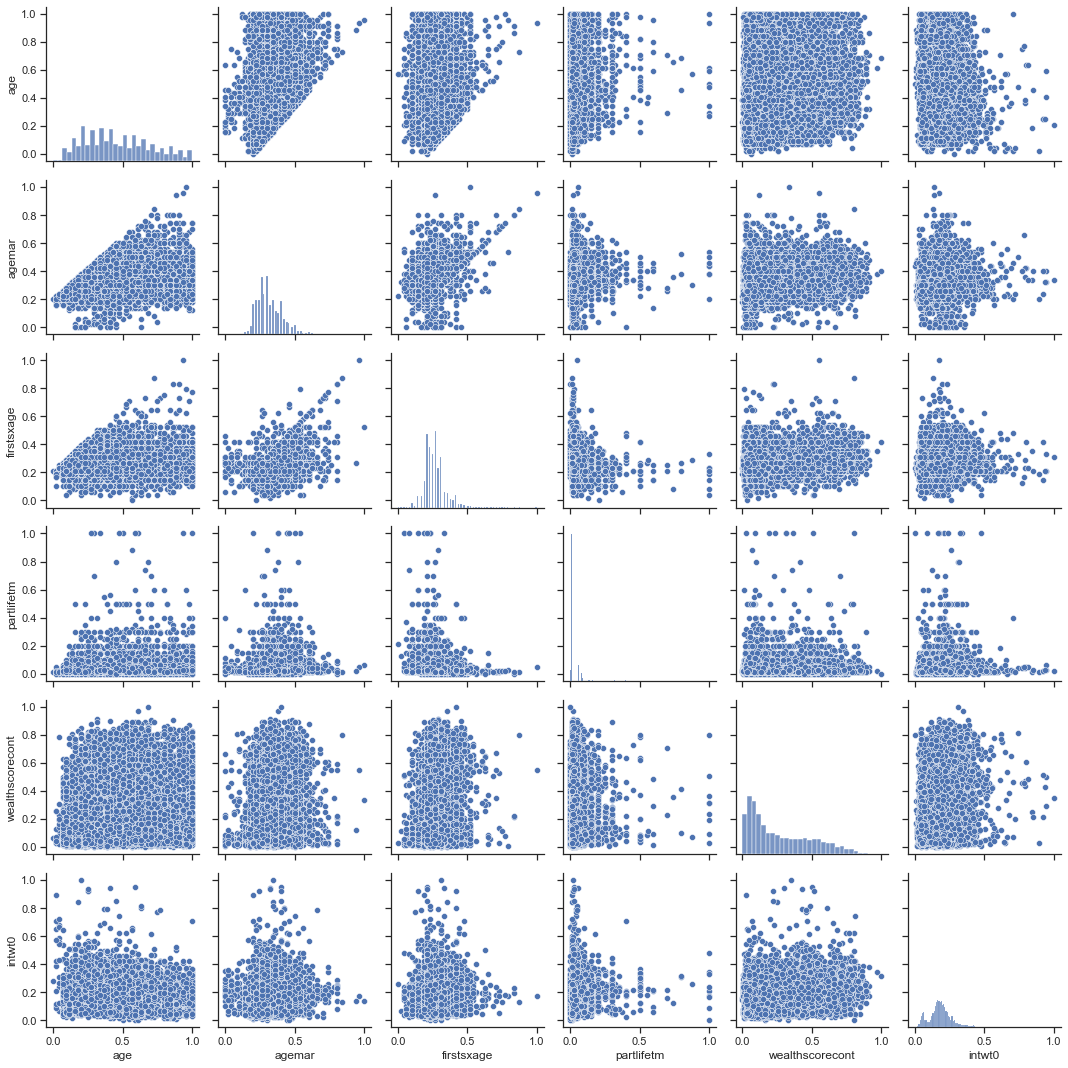

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['age', 'agemar', 'firstsxage', 'partlifetm', 'wealthscorecont', 'intwt0']
sns.pairplot(data_new1[cols],height=2.5)
plt.tight_layout()
plt.show()

In [95]:
import numpy as np
cols = ['age', 'agemar', 'firstsxage', 'partlifetm', 'wealthscorecont', 'intwt0']
correlation_coefficient = np.corrcoef(data_new1[cols].values.T)
print(correlation_coefficient)

[[ 1.00000000e+00  2.37607635e-01  1.31030390e-01  1.24787813e-01
   7.01153826e-02 -1.20940954e-01]
 [ 2.37607635e-01  1.00000000e+00  4.80537819e-01  1.84746551e-01
   2.16485870e-01  1.54871028e-01]
 [ 1.31030390e-01  4.80537819e-01  1.00000000e+00 -1.35577193e-01
   2.35110736e-01  6.55845417e-02]
 [ 1.24787813e-01  1.84746551e-01 -1.35577193e-01  1.00000000e+00
  -3.21107153e-04  9.52449959e-02]
 [ 7.01153826e-02  2.16485870e-01  2.35110736e-01 -3.21107153e-04
   1.00000000e+00  1.07345836e-01]
 [-1.20940954e-01  1.54871028e-01  6.55845417e-02  9.52449959e-02
   1.07345836e-01  1.00000000e+00]]


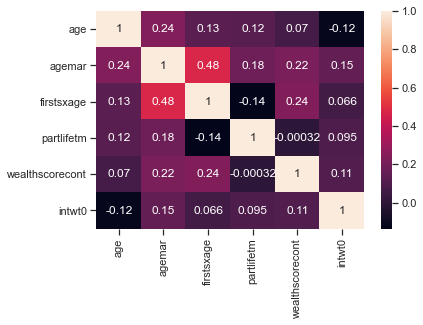

In [96]:
sns.heatmap(correlation_coefficient, annot=True, yticklabels = cols, xticklabels=cols)
plt.show()

In [97]:
# will have to specify the numeric one in the codes above 
#corr = df_num.corr()
#Plot figsize
#fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
#sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
#plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
#plt.show()

# FITTING OUR MODELS

In [98]:
X = data_new1.drop('hivstatusfinal_2', axis = 1)
y = data_new1['hivstatusfinal_2']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [100]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (6666, 27)
Shape of X_test:  (2858, 27)
Shape of y_train:  (6666,)
Shape of y_test (2858,)


# __CLASSIFICATION MODELS__

__LOGISTIC REGRESSION__

In [101]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
steps = [
    #('scalar', StandardScaler()),
    ('model', LogisticRegression())
]

lr_pipe = Pipeline(steps)

In [102]:
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state': [42] 
}

In [103]:
classifier_lr = GridSearchCV(lr_pipe, parameters, cv = 5)

In [104]:
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

In [105]:
print('Best parameters: %s' % classifier_lr.best_params_)

Best parameters: {'model__C': 1, 'model__fit_intercept': True, 'model__max_iter': 5000, 'model__multi_class': 'auto', 'model__n_jobs': -1, 'model__random_state': 42, 'model__solver': 'newton-cg', 'model__tol': 0.0001}


In [106]:
from sklearn.metrics import accuracy_score
y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.8345334533453346
Test set:  0.8379986004198741


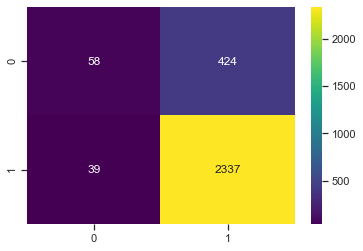

In [107]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()


__K-Nearest Neighbors (K-NN)__

In [108]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    #('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [109]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}

In [110]:
classifier_knn = GridSearchCV(knn_pipe, parameters, cv = 3)

In [111]:
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [112]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  0.8388838883888389
Test set:  0.8306508047585724


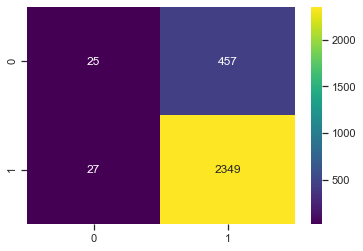

In [113]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__Support Vector Machine (SVM - Linear)__

In [116]:
from sklearn.svm import SVC
classifier_svm = SVC(probability=True)
steps = [
    #('scalar', StandardScaler()),
    ('model', SVC(probability=True))
]
svm_linear_pipe = Pipeline(steps)

In [117]:
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100],
               'model__random_state' : [42]
}

In [118]:
classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, cv = 3)

In [119]:
classifier_svm_linear = classifier_svm_linear.fit(X_train, y_train.ravel())

In [120]:
y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

Training set:  0.8313831383138314
Test set:  0.8313505948215535


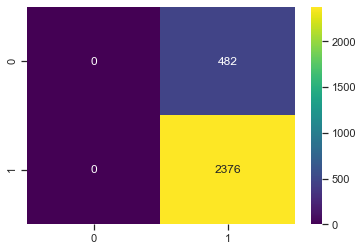

In [121]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__Support Vector Machine (SVM - Kernel)__

In [122]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(probability=True)
steps = [
    #('scalar', StandardScaler()),
    ('model', SVC(probability=True))
]
svm_kernel_pipe = Pipeline(steps)

In [123]:
parameters = { 'model__kernel' : ['rbf', 'poly', 'sigmoid'],
               'model__C' : [1,10,100],
               'model__gamma' : [0.01, 0.1, 1, 'scale'],
               'model__random_state' : [42],
               'model__degree' : [1,2,3]
}

In [124]:
classifier_svm_kernel = GridSearchCV(svm_kernel_pipe, parameters, cv = 3)

In [125]:
classifier_svm_kernel = classifier_svm_kernel.fit(X_train, y_train.ravel())

In [126]:
y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

Training set:  0.8394839483948395
Test set:  0.8372988103568929


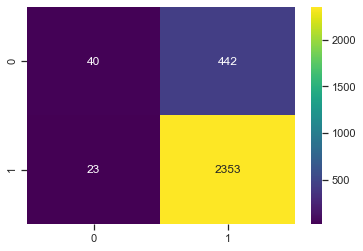

In [127]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_kernel_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__Naive Bayes__

In [128]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB()

In [129]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.7587758775877588
Test set:  0.7428271518544437


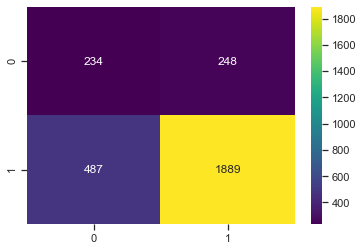

In [130]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__Decision Tree Classification__

In [131]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    #('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [132]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]

In [133]:
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           n_jobs = -1)

In [134]:
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [135]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.8396339633963397
Test set:  0.8369489153254024


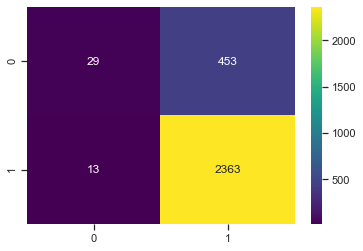

In [136]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__Random Forest Classification__

In [137]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()

steps = [
    #('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [138]:
parameters =  { "model__n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth": np.linspace(10, 110, num = 11),
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 4],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }   

In [139]:
classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter = 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)

In [140]:
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [141]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  0.918991899189919
Test set:  0.8383484954513646


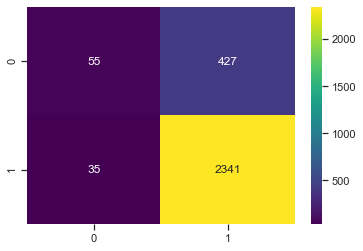

In [142]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [144]:
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ModuleNotFoundError: No module named 'xgboost'

__building for XG Boost__

In [ ]:
model = XGBClassifier()
classifier_XGB = model.fit(X_train, y_train.ravel())

In [ ]:
y_pred_XGB_train = classifier_XGB.predict(X_train)
accuracy_XGB_train = accuracy_score(y_train, y_pred_XGB_train)
print("Training set: ", accuracy_XGB_train)

y_pred_XGB_test = classifier_XGB.predict(X_test)
accuracy_XGB_test = accuracy_score(y_test, y_pred_XGB_test)
print("Test set: ", accuracy_XGB_test)

In [ ]:
# OR
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_XGB_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__Bagging Classifier for Decision Trees__

In [145]:
from sklearn.tree import DecisionTreeClassifier
bc = BaggingClassifier(DecisionTreeClassifier(random_state = 42))
classifier_bc = bc.fit(X_train, y_train.ravel())

NameError: name 'BaggingClassifier' is not defined

In [ ]:
y_pred_bc_train = classifier_bc.predict(X_train)
accuracy_bc_train = accuracy_score(y_train, y_pred_bc_train)
print("Training set: ", accuracy_bc_train)

y_pred_bc_test = classifier_bc.predict(X_test)
accuracy_bc_test = accuracy_score(y_test, y_pred_bc_test)
print("Test set: ", accuracy_bc_test)

In [ ]:
# OR
bc.score(X_train, y_train), bc.score(X_test, y_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_bc_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__AdaBoost Classifier__

In [ ]:
adb = AdaBoostClassifier(base_estimator = RandomForestClassifier(),n_estimators = 100, learning_rate = 1, random_state = 42)
classifier_adb = adb.fit(X_train, y_train.ravel())

In [ ]:
y_pred_adb_train = classifier_adb.predict(X_train)
accuracy_adb_train = accuracy_score(y_train, y_pred_adb_train)
print("Training set: ", accuracy_adb_train)

y_pred_adb_test = classifier_adb.predict(X_test)
accuracy_adb_test = accuracy_score(y_test, y_pred_adb_test)
print("Test set: ", accuracy_adb_test)

In [ ]:
# OR
adb.score(X_train, y_train), adb.score(X_test, y_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_adb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

__Gradient Boosting Classiifer__

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.2, random_state=42)
classifier_gbc = gbc.fit(X_train, y_train)

In [ ]:
y_pred_gbc_train = classifier_gbc.predict(X_train)
accuracy_gbc_train = accuracy_score(y_train, y_pred_gbc_train)
print("Training set: ", accuracy_gbc_train)

y_pred_gbc_test = classifier_gbc.predict(X_test)
accuracy_gbc_test = accuracy_score(y_test, y_pred_gbc_test)
print("Test set: ", accuracy_gbc_test)

In [ ]:
# OR
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report, recall_score, precision_score

# Evaluating the model using Accuracy

In [ ]:
models = [('Logistic Regression', accuracy_lr_train, accuracy_lr_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', accuracy_svm_linear_train, accuracy_svm_linear_test),
          #('SVM (Kernel)', accuracy_svm_kernel_train, accuracy_svm_kernel_test),
          ('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test),
          ('XGBoost', accuracy_XGB_train, accuracy_XGB_test),
          ('Bagging Classiifer for DT', accuracy_bc_train, accuracy_bc_test),
          ('AdaBoost', accuracy_adb_train, accuracy_adb_test),
         ]

___Comparing the Result___

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

# Evaluating the model using F1-Score

In [146]:
models1 = [('Logistic Regression', f1_score(y_test, y_pred_lr_test)),
            ('KNN', f1_score(y_test, y_pred_knn_test)),
            ('SVM (Linear)', f1_score(y_test, y_pred_svm_linear_test)),
            ('Decision Tree Classification', f1_score(y_test, y_pred_dt_test)),
            ('Naive Bayes', f1_score(y_test, y_pred_nb_test)),
            ('Random Forest Classification',f1_score(y_test, y_pred_rf_test)),
            ('XGBoost', f1_score(y_test, y_pred_XGB_test)),
            ('Bagging Classiifer for DT', f1_score(y_test, y_pred_bc_test)),
            ('AdaBoost', f1_score(y_test, y_pred_adb_test))
          ]

NameError: name 'f1_score' is not defined

In [ ]:
predict1 = pd.DataFrame(data = models1, columns=['Model', 'F1-Score'])
predict1

In [ ]:
predict1['F1-Score']

# Evaluating the model using precision

In [ ]:
print('Logistic Regression precision_score is:', precision_score(y_test, y_pred_lr_test),"\n")

print('KNN precision_score is:', precision_score(y_test, y_pred_knn_test),"\n")

print('Decision Tree precision_score is:', precision_score(y_test, y_pred_dt_test),"\n")

print('Naive Bayes precision_score  is:', precision_score(y_test, y_pred_nb_test),"\n")

print('Random Forest precision_score is:', precision_score(y_test, y_pred_rf_test),"\n")

In [ ]:
models2 = [('Logistic Regression', precision_score(y_test, y_pred_lr_test)),
            ('KNN', precision_score(y_test, y_pred_knn_test)),
            ('SVM (Linear)', precision_score(y_test, y_pred_svm_linear_test)),
            ('Decision Tree Classification', precision_score(y_test, y_pred_dt_test)),
            ('Naive Bayes', precision_score(y_test, y_pred_nb_test)),
            ('Random Forest Classification',precision_score(y_test, y_pred_rf_test)),
            ('XGBoost', precision_score(y_test, y_pred_XGB_test)),
            ('Bagging Classiifer for DT', precision_score(y_test, y_pred_bc_test)),
            ('AdaBoost', precision_score(y_test, y_pred_adb_test))
          ]

In [ ]:
predict2 = pd.DataFrame(data = models2, columns=['Model', 'Precision'])
predict2

# Evaluating the model using Recall

In [ ]:
models3 = [('Logistic Regression', recall_score(y_test, y_pred_lr_test)),
            ('KNN', recall_score(y_test, y_pred_knn_test)),
            ('SVM (Linear)', recall_score(y_test, y_pred_svm_linear_test)),
            ('Decision Tree Classification', recall_score(y_test, y_pred_dt_test)),
            ('Naive Bayes', recall_score(y_test, y_pred_nb_test)),
            ('Random Forest Classification',recall_score(y_test, y_pred_rf_test)),
            ('XGBoost', recall_score(y_test, y_pred_XGB_test)),
            ('Bagging Classiifer for DT', recall_score(y_test, y_pred_bc_test)),
            ('AdaBoost', recall_score(y_test, y_pred_adb_test))
          ]

In [ ]:
predict3 = pd.DataFrame(data = models3, columns=['Model', 'Recall'])
predict3

__Visualizing Models Performance__

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict1.sort_values(by=['F1-Score'], ascending=False, inplace=True)

sns.barplot(x='F1-Score', y='Model', data = predict1, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('F1-Score', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict2.sort_values(by=['Precision'], ascending=False, inplace=True)

sns.barplot(x='Precision', y='Model', data = predict2, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Precision', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [ ]:
predict3.sort_values(by=['Recall'], ascending=False, inplace=True)
sns.barplot(x='Recall', y='Model', data = predict3, palette='Blues_d')
plt.show()

# ROC CURVE

In [ ]:
#define metrics
y_pred_proba = classifier_lr.predict_proba(X_test)[:,1]  # This will give you positive class prediction probabilities  

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

# OR
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#auc

In [ ]:
#create ROC curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic For Logistic Regression')
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#define metrics
y_pred_proba = classifier_knn.predict_proba(X_test)[:,1]  # This will give you positive class prediction probabilities 

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
#create ROC curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic For KNN')
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#define metrics
y_pred_proba = classifier_nb.predict_proba(X_test)[:,1]  # This will give you positive class prediction probabilities 

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
#create ROC curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic For Naive Bayes')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#define metrics
y_pred_proba = classifier_dt.predict_proba(X_test)[:,1]  # This will give you positive class prediction probabilities 

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
#create ROC curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic For Decision Tree')
plt.plot(false_positive_rate,true_positive_rate, color='yellow',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#define metrics
y_pred_proba = classifier_rf.predict_proba(X_test)[:,1]  # This will give you positive class prediction probabilities 

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
#create ROC curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic For Random Forest')
plt.plot(false_positive_rate,true_positive_rate, color='orange',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

__to plot for SVM(Linear)__

In [ ]:
#define metrics
y_pred_proba = classifier_svm_linear.predict_proba(X_test)[:,1]  # This gives us positive class prediction probabilities

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
#create ROC curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic For SVM (Linear)')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

__to plot for SVM(Kernel)__

In [ ]:
#define metrics
y_pred_proba = classifier_svm_kernel.predict_proba(X_test)[:,1]  # This gives us positive class prediction probabilities 

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
#create ROC curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic For SVM (Linear)')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# NOTE 
# THIS LINK HELPS TO TRANSFORM BEFORE RUNNING THE CLASSIFICATION ALGORITM
# https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html

In [ ]:
# Value count
print(y_train.value_counts())

In [ ]:
print(y_test.value_counts())

In [ ]:
print(y.value_counts())